- *Name :* *Smruti Sonekar*
- *Branch :* *TY CSE DS*
- *UID :* *2021700064*
- *EXP NO :* *2*
- *Topic :* *Implement Simple Linear Regression*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

**The simplest form of simple linear regression has only one x variable and one y variable. The x variable is the independent variable because it is independent of what you try to predict the dependent variable. The y variable is the dependent variable because it depends on what you try to predict.**

- y = β0 +β1x+ε is the formula used for simple linear regression.

- y is the predicted value of the dependent variable (y) for any given value of the independent variable (x).
- B0 is the intercept, the predicted value of y when the x is 0.
- B1 is the regression coefficient – how much we expect y to change as x increases.
- x is the independent variable ( the variable we expect is influencing y).
- e is the error of the estimate, or how much variation there is in our regression coefficient estimate.

- **Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables.**
- **One variable, denoted x, is regarded as the predictor, explanatory, or independent variable. The other variable, denoted y, is regarded as the response, outcome, or dependent variable.**
- **The goal of simple linear regression is to find the best fitting straight line through the data points.** 
- **In linear regression we make assumption that relationship between x and y variables is linear and then we proceed.**
- **This line can be used to make predictions about the value of the dependent variable for a given value of the independent variable.** 
- **Simple linear regression is widely used in many fields, including economics, finance, biology, and engineering.**


*LEAST SQUARE REGRESSION*
- **The least squares method is a form of mathematical regression analysis used to determine the line of best fit for a set of data, providing a visual demonstration of the relationship between the data points. Each point of data represents the relationship between a known independent variable and an unknown dependent variable**
- **The method works by minimizing the sum of the offsets or residuals of points from the plotted curve.Least squares regression is used to predict the behavior of dependent variables**

In [2]:
#Coefficient 
def estimate_coeff(x,y):
    n=np.size(x)
    mx=np.mean(x)
    my=np.mean(y)

    SS_xy=np.sum(x*y)-n*mx*my
    SS_xx=np.sum(x*x)-n*mx*mx

    b1=SS_xy/SS_xx
    b0=my-b1*mx

    return (b0,b1)



In [3]:
df1=pd.DataFrame(pd.read_csv("./files/ecommerce.csv"))
df1.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [4]:
data1=df1[["Avg. Session Length","Yearly Amount Spent"]]
data1.head(5)

,Avg. Session Length,Yearly Amount Spent
0,34.497268,587.951054
1,31.926272,392.204933
2,33.000915,487.547505
3,34.305557,581.852344
4,33.330673,599.406092


In [5]:
data1.columns[data1.isnull().any()]


Index([], dtype='object')

In [6]:
#we drop duplicate entries for balanced dataset.
#drop_duplicates: Removes rows that have identical values in all columns.

#inplace=True: Modifies the original DataFrame rather than creating a new one.
data1.drop_duplicates(inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12084\3350501310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop_duplicates(inplace=True)


In [7]:
data1.describe()

,Avg. Session Length,Yearly Amount Spent
count,500.000000,500.000000
mean,33.053194,499.314038
std,0.992563,79.314782
min,29.532429,256.670582
25%,32.341822,445.038277
50%,33.082008,498.887875
75%,33.711985,549.313828
max,36.139662,765.518462


In [8]:
x=data1["Avg. Session Length"].values
y=data1["Yearly Amount Spent"].values

Text(0.5, 1.0, 'Avg session length  vs amt spent on shopping')

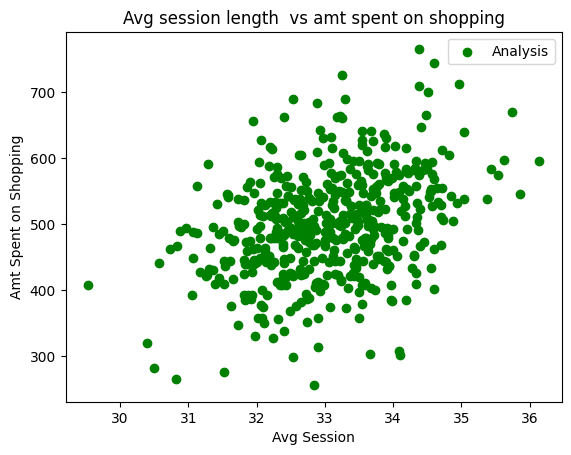

In [9]:
#plotting the graph between Average session length and Yearly amount spent 
plt.scatter(x,y,label="Analysis",color="Green")
plt.xlabel("Avg Session")
plt.ylabel("Amt Spent on Shopping")
plt.legend()
plt.title("Avg session length  vs amt spent on shopping")

In [10]:
#now we will find estimate coefficent and y predication from the function
b=estimate_coeff(x,y)
b0=b[0]
b1=b[1]
print("\n B0: ",b0)
print("\n B1: ",b1)


 B0:  -438.56274350433915

 B1:  28.3747705421147


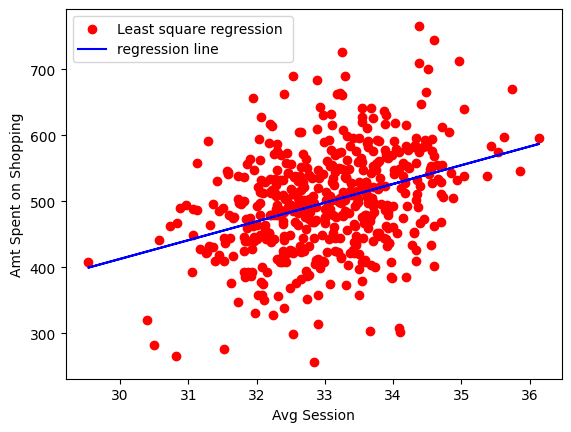

In [11]:
y_pred=b0+b1*x
plt.scatter(x,y,label="Least square regression ",color="red")
plt.xlabel("Avg Session")
plt.ylabel("Amt Spent on Shopping")
plt.plot(x,y_pred,color="blue",label="regression line")
plt.legend()

In [12]:
def mae(y_true,y_pred):
    n = len(y_true)
    mae = sum(abs(y_true[i] - y_pred[i]) for i in range(n)) / n
    return mae

In [13]:
def mse(y_true, y_pred):
    n = len(y_true)
    mse = sum((y_true[i] - y_pred[i]) ** 2 for i in range(n)) / n
    return mse

In [14]:
def r_squared(y_true, y_pred):
    n = len(y_true)
    mean_y = sum(y_true) / n
    numerator = sum((y_true[i] - y_pred[i]) ** 2 for i in range(n))
    denominator = sum((y_true[i] - mean_y) ** 2 for i in range(n))
    r2 = 1 - (numerator / denominator)
    return r2

In [15]:
m1=mae(y,y_pred)
m2=mse(y,y_pred)
r=r_squared(y,y_pred)
Rmse=np.sqrt(m2)
print("\nMAE by code:",m1)
print("\nMSE by code:",m2)
print("\nRMSE by code:",Rmse)
print("\nR2 SCORE by code:",r)


MAE by code: 57.22959205645618

MSE by code: 5486.642453152562

RMSE by code: 74.07187356313165

R2 SCORE by code: 0.12608769703838085


In [16]:
#Now graph from inbuilt linear regression function in sklearn 
x=x.reshape(-1,1)
y=y.reshape(-1,1)

from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm=LinearRegression()

In [20]:
lm.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred1=lm.predict(x_test)

In [22]:
a=lm.coef_  #b1
b=lm.intercept_ #b0
a,b

(array([[27.84659899]]), array([-418.50435154]))

In [23]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [24]:
mae=mean_absolute_error(y_test,y_pred1)
mse=mean_squared_error(y_test,y_pred1)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred1)
print("\nMAE:",mae)
print("\nMSE:",mse)
print("\nRMSE:",rmse)
print("\nR2 SCORE:",r2)


MAE: 53.86170471403876

MSE: 4644.143141811903

RMSE: 68.14795038599402

R2 SCORE: 0.1443199621950546


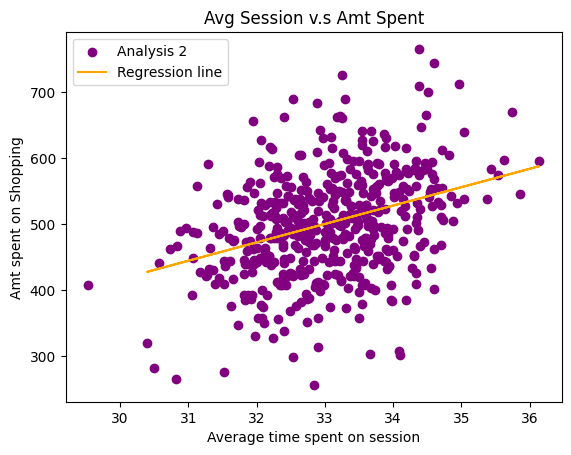

In [25]:
#
plt.scatter(x,y,label="Analysis 2",color="purple")
plt.plot(x_test,y_pred1,label="Regression line",color="orange")
plt.xlabel("Average time spent on session")
plt.ylabel("Amt spent on Shopping")
plt.title("Avg Session v.s Amt Spent")
plt.legend()

In [26]:
print("Training Score : {:.4f}".format(lm.score(x_train,y_train)))
print("Testing Score : {:.4f}".format(lm.score(x_test,y_test)))

Training Score : 0.1146
Testing Score : 0.1443


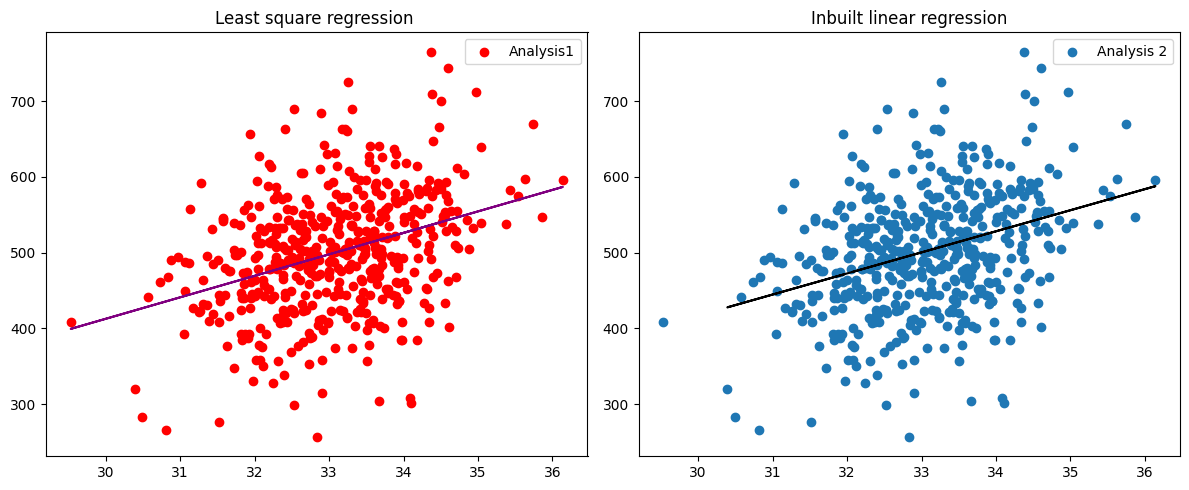

In [27]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Least square regression ")
ax1.scatter(x, y, label="Analysis1",color="red")
ax1.plot(x,b0+b1*x,color="purple")
ax1.legend()
#after scaling
ax2.set_title("Inbuilt linear regression")
ax2.scatter(x,y,label="Analysis 2")
ax2.plot(x_test,y_pred1,color="black")
ax2.legend()

fig.tight_layout()


**In analyzing the relationship between the average session time with stylists spent by customers and the yearly amount spent by customers, two methods were employed: traditional least squares regression and inbuilt linear regression. Both methods yielded comparable results, showcasing a similar trend in the relationship between the variables. However, slight disparities were observed in the errors generated by each method, with the inbuilt linear regression exhibiting minimized error.**

**When comparing the performance metrics of the two regression methods applied to the analysis of the relationship between average session time with stylists and the yearly amount spent by customers, it was found that the R-squared (R2) score for the inbuilt linear regression model was 0.144, while the R2 score for the traditional least squares regression was slightly lower at 0.126. This indicates that the inbuilt linear regression model explains a larger proportion of the variance in the yearly amount spent by customers compared to the traditional approach. The difference in R2 scores suggests that the inbuilt linear regression model may provide a better fit to the data and offer slightly improved predictive accuracy. Therefore, based on the higher R2 score, the inbuilt linear regression method appears to be the preferred choice for this particular analysis.**